In [9]:
import config as cfg
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
merged = gpd.read_file(cfg.INCOME_DATA / 'geometries_and_income.geojson') 
distritos = pd.read_csv(cfg.ZONIFICACION_DATA / 'distritos/PROCESSED_nombres_distritos.csv')
all_viajes = pd.read_csv(cfg.VIAJES_DATA / 'all_viajes_month_0322.csv')
filtered_viajes = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]
population = pd.read_csv('raw/poblacion_distritos_enero_21.csv', sep=';') # SOURCE: https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/?vgnextfmt=default&vgnextchannel=8156e39873674210VgnVCM1000000b205a0aRCRD

In [11]:
filtered_viajes.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,hombre,29.337,30.222
1,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,mujer,34.143,27.522
2,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,hombre,92.799,63.331
3,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,mujer,65.475,44.556
4,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,45-65,hombre,44.319,31.052


In [12]:
filtered_viajes['avg_distancia'] = filtered_viajes['viajes_km'] / filtered_viajes['viajes']

# Aggregate data for distancia
distancia_agg = filtered_viajes.groupby('distancia', as_index=False).agg({'viajes': 'sum'})

# Aggregate data for distancia2
distancia2_agg = filtered_viajes.groupby('avg_distancia', as_index=False).agg({'viajes': 'sum'})

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_23899/2116284853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_viajes['avg_distancia'] = filtered_viajes['viajes_km'] / filtered_viajes['viajes']


Text(0.5, 1.0, 'Distribution of Trips by Distance Brackets')

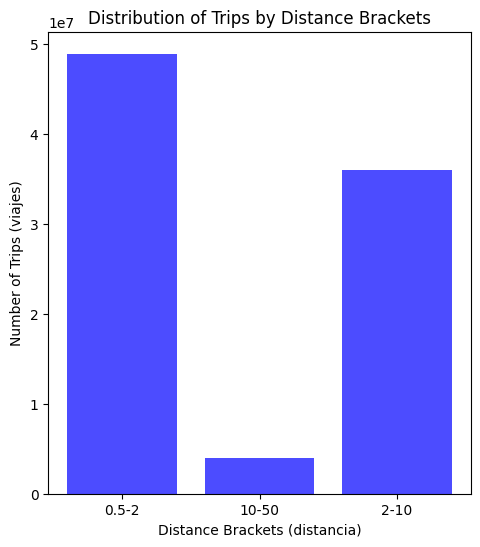

In [13]:
# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot for distancia
plt.subplot(1, 2, 1)
plt.bar(distancia_agg['distancia'], distancia_agg['viajes'], color='blue', alpha=0.7)
plt.xlabel('Distance Brackets (distancia)')
plt.ylabel('Number of Trips (viajes)')
plt.title('Distribution of Trips by Distance Brackets')

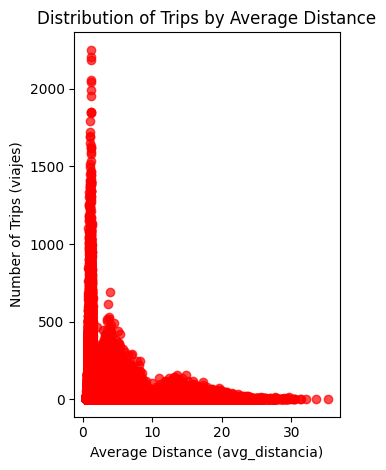

In [16]:
# Plot for distancia2
plt.subplot(1, 2, 2)
plt.scatter(distancia2_agg['avg_distancia'], distancia2_agg['viajes'], color='red', alpha=0.7)
plt.xlabel('Average Distance (avg_distancia)')
plt.ylabel('Number of Trips (viajes)')
plt.title('Distribution of Trips by Average Distance')

plt.tight_layout()
plt.show()

In [15]:
filtered_viajes

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km,avg_distancia
0,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,hombre,29.337,30.222,1.030167
1,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,mujer,34.143,27.522,0.806080
2,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,hombre,92.799,63.331,0.682453
3,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,mujer,65.475,44.556,0.680504
4,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,45-65,hombre,44.319,31.052,0.700648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900884,20220331,23,2807921,2807921,2-10,casa,no_frecuente,no,no,28,>15,25-45,mujer,3.400,7.835,2.304412
19900885,20220331,23,2807921,2807921,2-10,casa,no_frecuente,no,no,28,>15,45-65,hombre,2.005,9.351,4.663840
19900886,20220331,23,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,25-45,hombre,4.940,12.918,2.614980
19900887,20220331,23,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,45-65,hombre,4.010,9.502,2.369576
